In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from google.colab import files
import os
!pip install missingno
import missingno as msno

warnings.filterwarnings("ignore")
%matplotlib inline

**Upload dataset with Pandas**

In [2]:

!pip install -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"ruthreich","key":"c7da65d9587e023193fa14f5d7fe246d"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


!mkdir -p data
!kaggle datasets download -d joebeachcapital/loan-default \
  -f Anonymize_Loan_Default_data.csv -p ./data  --force


!unzip -o ./data/Anonymize_Loan_Default_data.csv -d ./data


!ls -l ./data | grep -i Anonymize_Loan_Default_data


import pandas as pd, csv, io

path = './data/Anonymize_Loan_Default_data.csv'


with open(path, 'r', encoding='latin1', errors='ignore') as f:
    sample = ''.join([next(f) for _ in range(500)])
dialect = csv.Sniffer().sniff(sample, delimiters=[',',';','\t','|'])
quotechar = dialect.quotechar or '"'
delimiter = dialect.delimiter

print("Detected delimiter:", repr(delimiter), "quotechar:", repr(quotechar))


df = pd.read_csv(
    path,
    sep=delimiter,
    quotechar=quotechar,
    engine='python',
    encoding='latin1',
    on_bad_lines='skip',
)
print(df.shape)
df.head()
display(df.head(1))
display(df.tail(1))

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/loan-default
License(s): DbCL-1.0
  0% 0.00/2.80M [00:00<?, ?B/s]
100% 2.80M/2.80M [00:00<00:00, 1.10GB/s]
Archive:  ./data/Anonymize_Loan_Default_data.csv
  inflating: ./data/Anonymize_Loan_Default_data.csv  
-rw-r--r-- 1 root root 9119950 Aug  2  2023 Anonymize_Loan_Default_data.csv
Detected delimiter: ',' quotechar: '"'
(38480, 37)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.0,0.0,< 1 year,...,1.0,0.0,0.0,0.0,0.0,Jan-07,0.0,Jan-07,Jan-07,1


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
38479,38480,1029847,1249126,3200.0,3200.0,3200.0,36 months,13.49,108.58,7 years,...,18.0,3908.767275,3908.77,3200.0,708.77,Dec-14,111.88,NaN,Nov-14,0


In [5]:
df.shape

(38480, 37)

**FILE COLUMNS EXPLAINING**

*   List item
*   List item



| #  | שם שדה                    | הסבר התוכן                                                                    |
| -- | ------------------------- | ----------------------------------------------------------------------------- |
| 1  | Unnamed: 0                | עמודת אינדקס טכנית שנוצרה אוטומטית בזמן שמירת הקובץ (ניתן להסיר).             |
| 2  | id                        | מזהה ייחודי לכל הלוואה.                                                       |
| 3  | member\_id                | מזהה פנימי של הלווה (אנונימי, לרוב לא בשימוש).                                |
| 4  | loan\_amnt                | סכום ההלוואה שהתבקש על ידי הלווה.                                             |
| 5  | funded\_amnt              | סכום שאושר ע"י המשקיעים או הפלטפורמה.                                         |
| 6  | funded\_amnt\_inv         | סכום שהושקע בפועל ע"י המשקיעים.                                               |
| 7  | term                      | תקופת ההלוואה – לרוב 36 או 60 חודשים.                                         |
| 8  | int\_rate                 | שיעור הריבית השנתית באחוזים.                                                  |
| 9  | installment               | סכום ההחזר החודשי של ההלוואה.                                                 |
| 10 | emp\_length               | ותק בעבודה של הלווה (למשל "10+ years", "<1 year").                            |
| 11 | home\_ownership           | סוג מגורים – OWN (בבעלות), RENT (שכירות), MORTGAGE (משכנתה).                  |
| 12 | annual\_inc               | ההכנסה השנתית של הלווה (בדולרים).                                             |
| 13 | verification\_status      | מצב אימות ההכנסה – Verified / Source Verified / Not Verified.                 |
| 14 | issue\_d                  | תאריך הנפקת ההלוואה (לדוגמה: “Jan-2012”).                                     |
| 15 | loan\_status              | מצב ההלוואה בפועל – Fully Paid / Charged Off / Default / Late וכו’.           |
| 16 | purpose                   | מטרת ההלוואה (רכב, חוב, לימודים, בית וכו’).                                   |
| 17 | zip\_code                 | קוד מיקוד (מעוגל לצורכי אנונימיות).                                           |
| 18 | addr\_state               | מדינת מגורים של הלווה (כמו CA, NY וכו’).                                      |
| 19 | dti                       | יחס חוב להכנסה (Debt-to-Income Ratio).                                        |
| 20 | delinq\_2yrs              | מספר הפעמים שהלווה היה באיחור בתשלומים ב־2 השנים האחרונות.                    |
| 21 | earliest\_cr\_line        | השנה שבה נפתח קו האשראי הראשון של הלווה.                                      |
| 22 | inq\_last\_6mths          | מספר הפעמים שבוצעו בירורי אשראי ב־6 חודשים האחרונים.                          |
| 23 | mths\_since\_last\_delinq | מספר החודשים שעברו מאז האיחור האחרון.                                         |
| 24 | open\_acc                 | מספר החשבונות הפתוחים (כרטיסי אשראי, הלוואות וכו’).                           |
| 25 | pub\_rec                  | מספר הרשומות הציבוריות השליליות (כמו פשיטת רגל).                              |
| 26 | revol\_bal                | יתרת חוב מסתובבת (Revolving Balance).                                         |
| 27 | revol\_util               | אחוז השימוש במסגרות אשראי (Revolving Utilization).                            |
| 28 | total\_acc                | מספר החשבונות הכולל (פתוחים + סגורים).                                        |
| 29 | total\_pymnt              | סכום כולל ששולם ע"י הלווה עד כה (כולל קרן וריבית).                            |
| 30 | total\_pymnt\_inv         | סכום כולל שהוחזר למשקיעים.                                                    |
| 31 | total\_rec\_prncp         | סכום הקרן שהוחזר בפועל.                                                       |
| 32 | total\_rec\_int           | סכום הריבית שהוחזרה בפועל.                                                    |
| 33 | last\_pymnt\_d            | תאריך התשלום האחרון שבוצע.                                                    |
| 34 | last\_pymnt\_amnt         | סכום התשלום האחרון שבוצע.                                                     |
| 35 | next\_pymnt\_d            | תאריך התשלום הבא הצפוי (אם ההלוואה עדיין פעילה).                              |
| 36 | last\_credit\_pull\_d     | תאריך שבו נבדק לאחרונה דוח האשראי של הלווה.                                   |
| 37 | repay\_fail               | משתנה יעד בינארי (0/1) – 1 מציין חדלות פירעון, 0 מציין שההלוואה נפרעה בהצלחה. |



In [6]:
! mkdir -p pickles

**Flatfile**

In [7]:
def write_flat_file(df, filename):
  writer = pd.ExcelWriter(filename, engine="openpyxl")

  df.head().to_excel(writer, sheet_name='head')
  df.tail().to_excel(writer, sheet_name='tail')
  df.describe().to_excel(writer, sheet_name='describe')
  df.dtypes.to_excel(writer, sheet_name='data_type')
  df.select_dtypes(include=np.number).max().to_excel(writer, sheet_name='max - numeric columns')
  df.select_dtypes(include=np.number).min().to_excel(writer, sheet_name='min - numeric columns')
  df.isnull().sum(axis=0).to_excel(writer, sheet_name='NA')
  df.nunique().to_excel(writer, sheet_name='unique')

  writer.close()
  print(f"Flat file: {filename}")

write_flat_file(df, "./pickles/Loan_Default_flatfile.xlsx")

Flat file: ./pickles/Loan_Default_flatfile.xlsx


In [8]:
df.nunique()

,0
Unnamed: 0,38480
id,38480
member_id,38480
loan_amnt,881
funded_amnt,1036
funded_amnt_inv,8473
term,2
int_rate,392
installment,15475
emp_length,11


In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,1
funded_amnt,1
funded_amnt_inv,1
term,0
int_rate,0
installment,1
emp_length,993


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              38480 non-null  int64  
 1   id                      38480 non-null  int64  
 2   member_id               38480 non-null  int64  
 3   loan_amnt               38479 non-null  float64
 4   funded_amnt             38479 non-null  float64
 5   funded_amnt_inv         38479 non-null  float64
 6   term                    38480 non-null  object 
 7   int_rate                38480 non-null  float64
 8   installment             38479 non-null  float64
 9   emp_length              37487 non-null  object 
 10  home_ownership          38480 non-null  object 
 11  annual_inc              38478 non-null  float64
 12  verification_status     38480 non-null  object 
 13  issue_d                 38480 non-null  object 
 14  loan_status             38480 non-null

# DATA PREPERATION

In [11]:
unique_id_cols = ['Unnamed: 0','id','member_id']
#3
dup_cols       = ['zip_code','loan_status']
#2
large_cat_cols = []
#0
small_cat_cols = ['term','emp_length','home_ownership','verification_status','purpose','addr_state']
#6
cont_cols      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec']
#20
date_cols      = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
#5
cat_cols       = large_cat_cols + small_cat_cols
y_col          = 'repay_fail'
#1
MERGE_ID_COL   = 'id' # if we'll need to merge pickels later


In [12]:
#There few only one nulls
#We can either drop 1 rows with most off the unique null id = 1 and loan_amount = 0 in  id = 2
df = df[~df['id'].isin([1, 2])].copy()
rem = df[df['id'].isin([1,2])]
print("נשארו אחרי הסינון:", len(rem))
#option1
#df.fillna("Unknown", inplace=True)

#option2
#rows_with_null_names = df[df.track_name.isna()]
#df = df.drop(rows_with_null_names.index)

נשארו אחרי הסינון: 0


preperation of pickle file for all droped items

In [13]:
def pickle_col(df, col='all', drop_col=False, include_merge_ID=True, pickle_name=""):

  import pickle
  if pickle_name == "":
    file_name = f"./pickles/{col}.pkl"
  else:
    file_name = f"./pickles/{pickle_name}.pkl"

  with open(file_name, 'wb') as f:

    if col =='all':
      pickle.dump(df, f)

    elif col in df.columns: # in case we aready droped the col before

      # track_id for a later merge, if we need.
      #and y_col so can can invetigate the pickel later indepandantly from the main df
      pickle.dump(df[[MERGE_ID_COL, col, y_col]], f)

    f.close()

  if drop_col == True:
    df.drop(col, axis=1, inplace=True, errors='ignore')

  return df

UNIQUE KEYS to drop

In [14]:
#Because there are multiple unique keys, the redundant ones are removed, leaving only one in order to perform a future MERGE operation if needed.
#df=df.drop(columns=['Unnamed: 0','member_id'])
to_drop = ['Unnamed: 0','member_id']
print(to_drop)
for c in to_drop:
    df = pickle_col(df, col=c, drop_col=True, pickle_name=f"drop_{c}")


['Unnamed: 0', 'member_id']


drop of  NULL columns

In [15]:
#drop more then 50% NULL COLUMNS
#df=df.drop(columns=['next_pymnt_d','mths_since_last_delinq'])
THRESH = 0.50  # 50%
null_ratio = df.isna().mean()
to_drop = null_ratio[null_ratio > THRESH].index
print(to_drop)
#df = df.drop(columns=to_drop).copy()
for c in to_drop:
    df = pickle_col(df, col=c, drop_col=True, pickle_name=f"drop_{c}")


Index(['mths_since_last_delinq', 'next_pymnt_d'], dtype='object')


The columns ['zip_code', 'loan_status'] were removed.

The zip_code column was dropped because it contains non-relevant information  the postal code was altered for borrower privacy, and in addition, the postal codes are almost uniquely represented by the state: in 99% of cases, each ZIP code appears in only one state. Only about 1% of ZIP codes appear in more than one state, and even then, 99% of their occurrences belong to a single main state. Therefore, the column was deemed redundant and removed.

The loan_status column was removed because it is determined after the loan has ended, and its categorical values directly indicate whether the loan defaulted or not. Since the target variable repay_fail already captures that information, keeping loan_status would create data leakage and duplicate information related to default behavior, so it was excluded.

In [16]:
dup_cols       = ['zip_code','loan_status']
to_drop = dup_cols
print(to_drop)
for c in to_drop:
    df = pickle_col(df, col=c, drop_col=True, pickle_name=f"drop_{c}")


['zip_code', 'loan_status']


In [17]:
print(df.isnull().sum()[df.isnull().any()])

emp_length            993
annual_inc              1
revol_bal               3
revol_util             59
last_pymnt_d           71
last_credit_pull_d      3
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38478 non-null  int64  
 1   loan_amnt            38478 non-null  float64
 2   funded_amnt          38478 non-null  float64
 3   funded_amnt_inv      38478 non-null  float64
 4   term                 38478 non-null  object 
 5   int_rate             38478 non-null  float64
 6   installment          38478 non-null  float64
 7   emp_length           37485 non-null  object 
 8   home_ownership       38478 non-null  object 
 9   annual_inc           38477 non-null  float64
 10  verification_status  38478 non-null  object 
 11  issue_d              38478 non-null  object 
 12  purpose              38478 non-null  object 
 13  addr_state           38478 non-null  object 
 14  dti                  38478 non-null  float64
 15  delinq_2yrs          38478 non-null  floa

In [19]:
#df.nunique()

In [20]:
#after droping
unique_id_cols = ['id']
#1
dup_cols       = []
#0
large_cat_cols = []
#0
small_cat_cols = ['term','emp_length','home_ownership','verification_status','purpose','addr_state']
#6
cont_cols      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec']
#19
date_cols      = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
#4
cat_cols       = large_cat_cols + small_cat_cols
y_col          = 'repay_fail'

#1
MERGE_ID_COL   = 'id' # if we'll need to merge pickels later


**CATEGOTICAL**

In [21]:
print(df.term.value_counts(),  df.term.isnull().sum())

term
36 months    28592
60 months     9886
Name: count, dtype: int64 0


In [22]:
print(df.emp_length.value_counts())
print( df.emp_length.isnull().sum())

emp_length
10+ years    8464
< 1 year     4564
2 years      4292
3 years      3939
4 years      3314
1 year       3254
5 years      3171
6 years      2144
7 years      1702
8 years      1445
9 years      1196
Name: count, dtype: int64
993


In [23]:
# 10 categories employment is small enoght to keep
# Mapping emp_length
emp_length_dict = {

    "< 1 year":0,
    "1 year" :1,
    "2 years" :2,
    "3 years":3,
    "4 years":4,
    "5 years":5,
    "6 years":6,
    "7 years":7,
    "8 years":8,
    "9 years":9,
    "10+ years":10
}
#if df['emp_length'].dtype == 'int64': # or maybe I'm just rerunnig this cell
df['emp_length'] = df['emp_length'].map(emp_length_dict).astype('string')


In [24]:
print(df.emp_length.value_counts())

emp_length
10.0    8464
0.0     4564
2.0     4292
3.0     3939
4.0     3314
1.0     3254
5.0     3171
6.0     2144
7.0     1702
8.0     1445
9.0     1196
Name: count, dtype: Int64


In [25]:
print(df.home_ownership.value_counts(),  df.home_ownership.isnull().sum())

home_ownership
RENT        18252
MORTGAGE    17139
OWN          2958
OTHER         125
NONE            4
Name: count, dtype: int64 0


In [26]:
print(df.verification_status.value_counts(),  df.verification_status.isnull().sum())

verification_status
Not Verified       16961
Verified           12169
Source Verified     9348
Name: count, dtype: int64 0


In [27]:
print(df.purpose.value_counts(),  df.purpose.isnull().sum())

purpose
debt_consolidation    17917
credit_card            4973
other                  3950
home_improvement       2901
major_purchase         2078
small_business         1808
car                    1481
wedding                 909
medical                 675
moving                  562
house                   387
educational             386
vacation                360
renewable_energy         91
Name: count, dtype: int64 0


In [28]:
df.addr_state.value_counts(),  df.addr_state.isnull().sum()

(addr_state
 CA    6754
 NY    3702
 FL    2803
 TX    2633
 NJ    1795
 IL    1523
 PA    1491
 GA    1371
 VA    1343
 MA    1285
 OH    1209
 MD    1010
 AZ     856
 WA     798
 CO     771
 NC     747
 CT     722
 MI     708
 MO     677
 MN     597
 NV     485
 WI     473
 AL     439
 SC     438
 OR     419
 LA     415
 KY     313
 OK     284
 KS     271
 UT     254
 AR     238
 DC     196
 NM     186
 RI     186
 NH     170
 HI     168
 WV     166
 DE     124
 MT      88
 WY      78
 AK      77
 SD      57
 VT      52
 TN      30
 MS      24
 IN      19
 IA      12
 NE      10
 ID       8
 ME       3
 Name: count, dtype: int64,
 np.int64(0))

In [29]:
col_to_cat = small_cat_cols  #['term','home_ownership','verification_status','purpose','addr_state','emp_length']
for col in col_to_cat:
  df[col]=df[col].astype('category')

📊 Insights from the Plots
1. Loan Term (36 vs 60 months)

Counts by Term (Top-left plot):

Most loans are for 36 months.

Fewer loans are for 60 months.

The number of defaults (repay_fail = 1) is lower in total for both terms, but more frequent relative to the number of loans in the 60-month group.

Default Rate by Term (Top-right plot):

The default rate is higher for 60-month loans (around 22–23%).

The default rate for 36-month loans is lower (around 13–14%).

✅ Conclusion: Longer-term loans (60 months) are riskier and have a significantly higher probability of default.

2. Employment Length

Counts by Employment Length (Bottom-left plot):

Most borrowers have 10+ years of employment.

As employment length decreases (0–10 years), the number of borrowers gradually declines.

There are some borrowers with missing employment data, but it's a small group.

Default Rate by Employment Length (Bottom-right plot):

Default rates are fairly consistent across most employment lengths (around 13–16%).

However:

Borrowers with 10+ years of employment have a slightly lower default rate.

Borrowers with missing employment length have the highest default rate (≈20%).

✅ Conclusion:

Employment length does not strongly affect default rate except in two special cases:

10+ years employment = more stable & lower risk.

Missing employment info = highest risk — this may indicate unreliable borrowers.


Factor	Insight
Loan Term	60-month loans have a much higher risk of default compared to 36-month loans.
Employment Length	Default risk stays fairly stable across employment lengths except: High risk in missing data, and lower risk for 10+ years employed.
Missing Values	Missing employment data is a strong signal for higher default risk.

1. Home Ownership vs Default (Top row)

Counts by Home Ownership (Left):

Most borrowers either rent (RENT) or have a mortgage (MORTGAGE).

Fewer borrowers own their homes outright (OWN).

Very few belong to the OTHER category.

Defaults (repay_fail = 1) exist across all categories but are highest in volume among renters and mortgage holders simply because those groups are largest.

Default Rate by Home Ownership (Right):

Default rate is highest for “OTHER” category (around 22–23%).

OWN and RENT are moderate, around 16–17%.

Lowest default rate is for MORTGAGE borrowers (around 14–15%).

📌 What this means:

Borrowers with a mortgage tend to be the most reliable.

Borrowers categorized as OTHER (e.g., unknown/unconventional housing) are the riskiest.

Fully owning a house does not necessarily mean lower risk than having a mortgage.

2. Income Verification Status vs Default (Bottom row)

Counts by Verification Status (Left):

Most borrowers are Not Verified or Verified.

There are fewer in Source Verified (where income has been verified with the employer or financial source).

Defaults occur in all categories.

Default Rate by Verification Status (Right):

Verified loans have the highest default rate (~15–16%).

Not Verified and Source Verified have similar and slightly lower default rates (~14–15%).

📌 What this means:

Verification alone does not guarantee lower risk; surprisingly, “Verified” loans show slightly higher default rates.

"Source Verified" borrowers (most trusted verification) do not show much lower default rates than unverified ones.

This suggests that borrowers' financial behavior matters more than whether their income was verified.

Key Conclusions
Feature	Low Default Risk	High Default Risk
Home Ownership	Mortgage borrowers	"Other" housing type
Verification Status	Not Verified / Source Verified	Verified (slightly higher risk)

Counts by Purpose (Left Plot):

Most loans were taken for:

Debt consolidation (by far the highest).

Credit card payments.

Other, home improvement, major purchase, and small business.

Categories like renewable energy, educational, vacation, wedding, etc. are much less common.

Default cases (repay_fail = 1) appear in all categories but are most frequent in categories that have more total loans (especially debt consolidation and credit card).

2. Default Rate by Purpose (Right Plot):

Although “debt consolidation” has the most defaults in total, its default rate is moderate (~13–14%).

The highest default rate is in loans for small business (around 23–25%) — the riskiest loan purpose.

High-risk categories also include:

Renewable energy

Educational

Major purchase

House

Lowest default rates are observed in:

Car

Home improvement

Credit card

Debt consolidation (despite large volume)

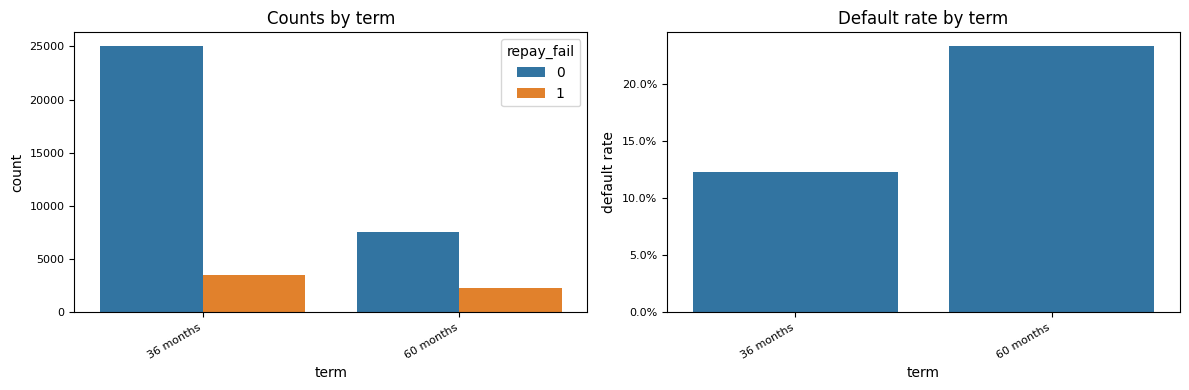

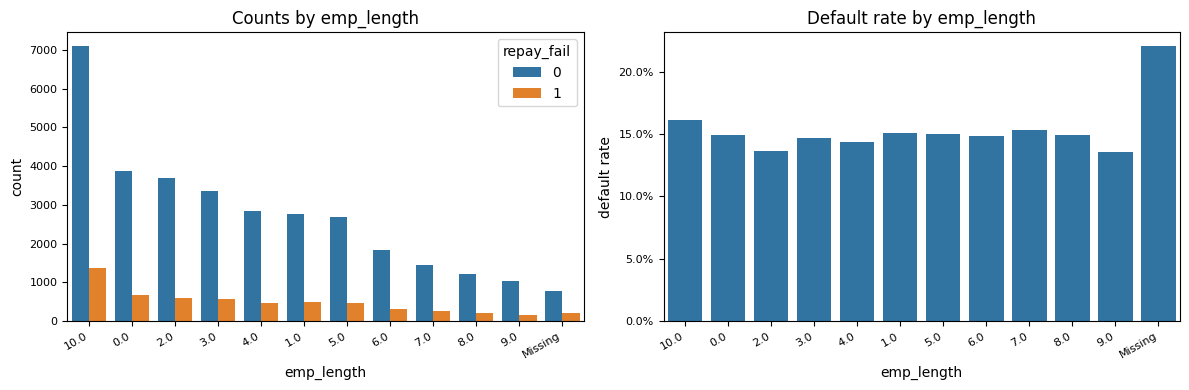

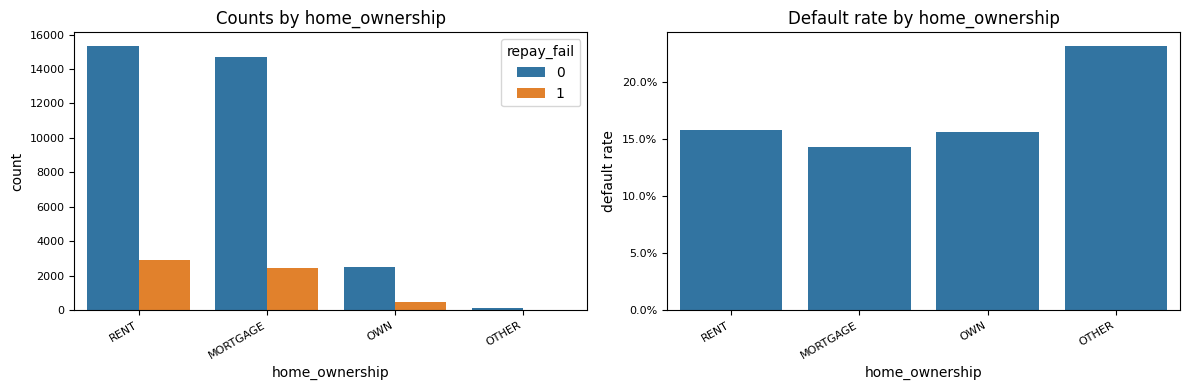

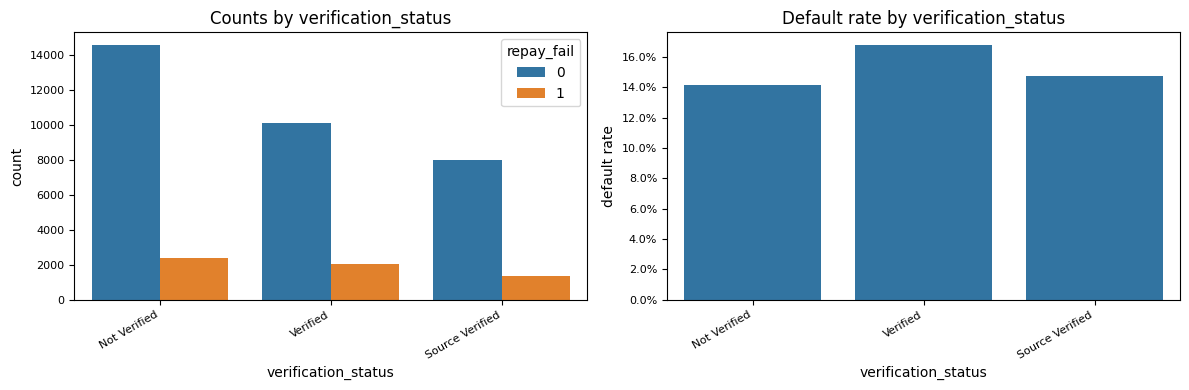

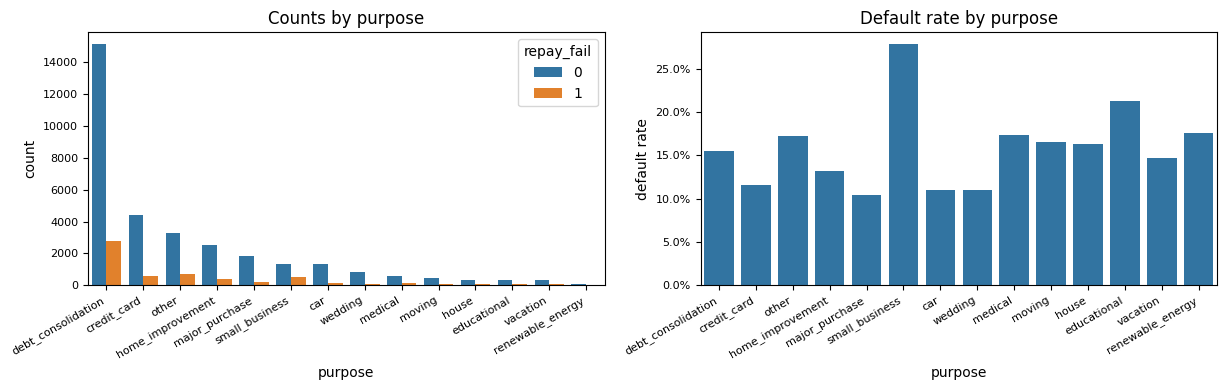

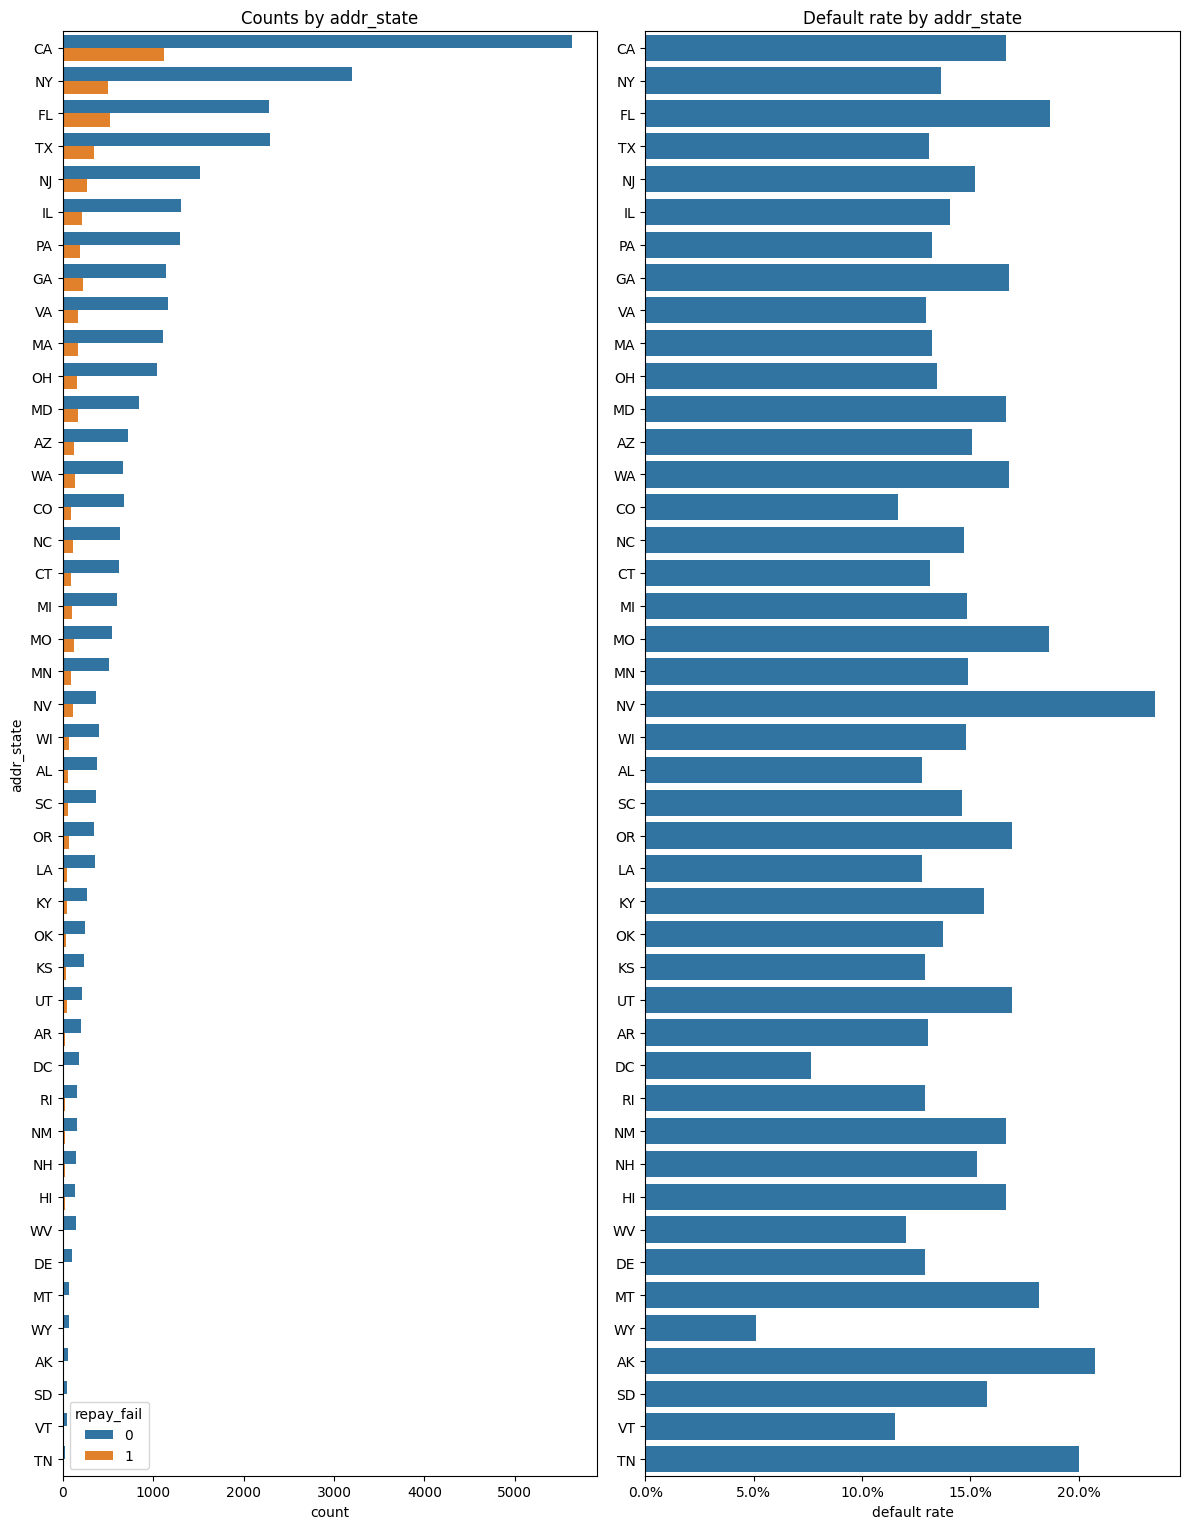

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def plot_counts_and_rate_by_cats(df, cat_cols=small_cat_cols, repay_col='repay_fail',
                                 top_n=None, min_count=30, horizontal_if_many=True):
    for col in cat_cols:
        # מוסיפים קטגוריית Missing ושומרים סדר לפי שכיחות
        s = df[col].astype('category').cat.add_categories(['Missing']).fillna('Missing')
        total_order = s.value_counts().index.tolist()
        if top_n is not None:
            total_order = total_order[:top_n]

        # טבלת ספירות לפי קטגוריה ו-repay_fail
        counts = (pd.DataFrame({col: s, repay_col: df[repay_col]})
                    .groupby([col, repay_col]).size()
                    .reset_index(name='count'))
        counts = counts[counts[col].isin(total_order)]

        # טבלת אחוז כשל + סינון קטגוריות עם מעט דגימות
        rate = (pd.DataFrame({col: s, repay_col: df[repay_col]})
                  .groupby(col)[repay_col]
                  .agg(default_rate='mean', n='count')
                  .reset_index())
        rate = rate[rate['n'] >= min_count]
        # שמירה על אותו סדר ב־rate כפי שב־counts
        order = [c for c in total_order if c in rate[col].tolist()]
        rate = rate[rate[col].isin(order)]

        # בחירת כיוון גרפים
        use_horizontal = horizontal_if_many and len(order) > 25

        # ציור שני הגרפים זה לצד זה
        if use_horizontal:
            fig, axes = plt.subplots(1, 2, figsize=(12, max(4, len(order)*0.35)))
            sns.barplot(data=counts, y=col, x='count', hue=repay_col, order=order, ax=axes[0])
            axes[0].set_ylabel(col); axes[0].set_xlabel("count"); axes[0].set_title(f"Counts by {col}")
            sns.barplot(data=rate, y=col, x='default_rate', order=order, ax=axes[1])
            axes[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
            axes[1].set_ylabel(""); axes[1].set_xlabel("default rate"); axes[1].set_title(f"Default rate by {col}")
        else:
            fig, axes = plt.subplots(1, 2, figsize=(max(12, len(order)*0.6+4), 4))
            sns.barplot(data=counts, x=col, y='count', hue=repay_col, order=order, ax=axes[0])
            axes[0].set_xlabel(col); axes[0].set_ylabel("count"); axes[0].set_title(f"Counts by {col}")
            axes[0].tick_params(axis='x', labelsize=8); axes[0].tick_params(axis='y', labelsize=8)
            axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')

            sns.barplot(data=rate, x=col, y='default_rate', order=order, ax=axes[1])
            axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
            axes[1].set_xlabel(col); axes[1].set_ylabel("default rate"); axes[1].set_title(f"Default rate by {col}")
            axes[1].tick_params(axis='x', labelsize=8); axes[1].tick_params(axis='y', labelsize=8)
            axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')

        # מקרא מסודר ושוליים
        axes[0].legend(title='repay_fail', loc='best')
        plt.tight_layout()
        plt.show()

# שימוש:
plot_counts_and_rate_by_cats(df, top_n=50, min_count=30)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   38478 non-null  int64   
 1   loan_amnt            38478 non-null  float64 
 2   funded_amnt          38478 non-null  float64 
 3   funded_amnt_inv      38478 non-null  float64 
 4   term                 38478 non-null  category
 5   int_rate             38478 non-null  float64 
 6   installment          38478 non-null  float64 
 7   emp_length           37485 non-null  category
 8   home_ownership       38478 non-null  category
 9   annual_inc           38477 non-null  float64 
 10  verification_status  38478 non-null  category
 11  issue_d              38478 non-null  object  
 12  purpose              38478 non-null  category
 13  addr_state           38478 non-null  category
 14  dti                  38478 non-null  float64 
 15  delinq_2yrs          384

**Continuance**

In [32]:
# נשמור רק עמודות שקיימות בפועל ב-DF
cols = [c for c in cont_cols if c in df.columns]

# תצוגה מהירה של השורות הראשונות
df.head(10)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
1,545583,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4.0,RENT,20004.0,...,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Jun-16,0
2,532101,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4.0,RENT,59000.0,...,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,Mar-12,1
3,877788,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10.0,MORTGAGE,53796.0,...,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,Mar-14,0
4,875406,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10.0,RENT,30000.0,...,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,Jun-16,0
5,506439,3600.0,3600.0,3600.00000,36 months,10.25,116.59,10.0,MORTGAGE,675048.0,...,0%,25.0,4206.031191,4206.03,3600.00,606.03,May-13,146.75,Jun-16,0
6,981465,8000.0,8000.0,8000.00000,36 months,6.03,243.49,<NA>,MORTGAGE,77736.0,...,13.60%,49.0,8724.971815,8724.97,8000.00,724.97,Apr-14,1423.66,Apr-14,0
7,749050,6000.0,6000.0,6000.00000,36 months,7.49,186.61,3.0,RENT,35000.0,...,47.70%,9.0,6717.950109,6717.95,6000.00,717.95,May-14,211.41,May-14,0
8,1016373,25600.0,25600.0,25472.82947,60 months,14.27,599.26,4.0,RENT,86000.0,...,70.80%,32.0,32840.056740,32659.13,25600.00,7240.06,Apr-14,16083.78,Jun-16,0
9,786870,19750.0,19750.0,19750.00000,60 months,23.22,559.27,10.0,MORTGAGE,72500.0,...,98.70%,44.0,27544.891160,27544.89,19750.00,7794.89,Jun-13,15264.34,Feb-16,0
10,1019261,6250.0,6250.0,6250.00000,36 months,17.27,223.68,4.0,MORTGAGE,28000.0,...,8.46%,15.0,6688.640000,6688.64,4764.18,1713.09,Apr-14,223.68,Sep-14,1


In [33]:
#הסרת סימן אחוז
df['revol_util'] = df['revol_util'].str.strip('%').astype(float)

In [34]:
print(cont_cols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'pub_rec']


In [35]:
#round amounts (not precentage)
amount_cols =['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths',  'open_acc', 'revol_bal',  'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'pub_rec']
for col in amount_cols:
  df[col] = pd.to_numeric(df[col], errors='coerce').round().astype('Int64')

In [36]:
df.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
1,545583,2500,2500,2500,36 months,13.98,85,4.0,RENT,20004,...,21.30,10,3075,3075,2500,575,Jul-13,91,Jun-16,0
2,532101,5000,5000,5000,36 months,15.95,176,4.0,RENT,59000,...,99.90,15,2949,2949,1909,874,Nov-11,176,Mar-12,1
3,877788,7000,7000,7000,36 months,9.91,226,10.0,MORTGAGE,53796,...,47.20,20,8082,8082,7000,1082,Mar-14,1550,Mar-14,0
4,875406,2000,2000,2000,36 months,5.42,60,10.0,RENT,30000,...,0.00,15,2162,2162,2000,162,Feb-14,53,Jun-16,0
5,506439,3600,3600,3600,36 months,10.25,117,10.0,MORTGAGE,675048,...,0.00,25,4206,4206,3600,606,May-13,147,Jun-16,0
6,981465,8000,8000,8000,36 months,6.03,243,<NA>,MORTGAGE,77736,...,13.60,49,8725,8725,8000,725,Apr-14,1424,Apr-14,0
7,749050,6000,6000,6000,36 months,7.49,187,3.0,RENT,35000,...,47.70,9,6718,6718,6000,718,May-14,211,May-14,0
8,1016373,25600,25600,25473,60 months,14.27,599,4.0,RENT,86000,...,70.80,32,32840,32659,25600,7240,Apr-14,16084,Jun-16,0
9,786870,19750,19750,19750,60 months,23.22,559,10.0,MORTGAGE,72500,...,98.70,44,27545,27545,19750,7795,Jun-13,15264,Feb-16,0
10,1019261,6250,6250,6250,36 months,17.27,224,4.0,MORTGAGE,28000,...,8.46,15,6689,6689,4764,1713,Apr-14,224,Sep-14,1


loan_amnt – סכום ההלוואה המבוקש/שהונפק רשמית. זה ה־“amount on the note”.

funded_amnt – הסכום הכולל שנגויס עבור ההלוואה בזמן צילום הנתונים
 (כולל פלטפורמה/מממן ראשי אם השתתף).
  ברוב ההלוואות שאושרו לגמרי: שווה ל־loan_amnt.
   יכול להיות נמוך יותר אם לא גויס מלוא הסכום.

funded_amnt_inv – הסכום שמומן על-ידי משקיעים בלבד.
אם הפלטפורמה השלימה חלק מהסכום, אז:
funded_amnt_inv≤funded_amnt

וברוב המקרים
funded_amnt=loan_amnt ו-
funded_amnt_inv≤loan_amnt.

דוגמאות תרחיש

הלוואה 10,000: נגייס כולו ממשקיעים ⇒
loan_amnt=10000, funded_amnt=10000, funded_amnt_inv=10000.

הלוואה 10,000: נגייס 9,000 ממשקיעים והיתרה 1,000 מהפלטפורמה ⇒
loan_amnt=10000, funded_amnt=10000, funded_amnt_inv=9000.

הלוואה לא גויסה במלואה (בצילום ביניים) ⇒
loan_amnt=10000, funded_amnt=8500, funded_amnt_inv<=8500.

loan_amnt: Borrower’s request

funded_amnt: Amount approved/funded by the platform

funded_amnt_inv: Amount actually invested by investors

Relationship between them
Field	Represents	Typical Order
loan_amnt	What the borrower requested	          Highest
funded_amnt	What the platform approved	        ≤ loan_amnt
funded_amnt_inv	What investors actually funded	≤ funded_amnt


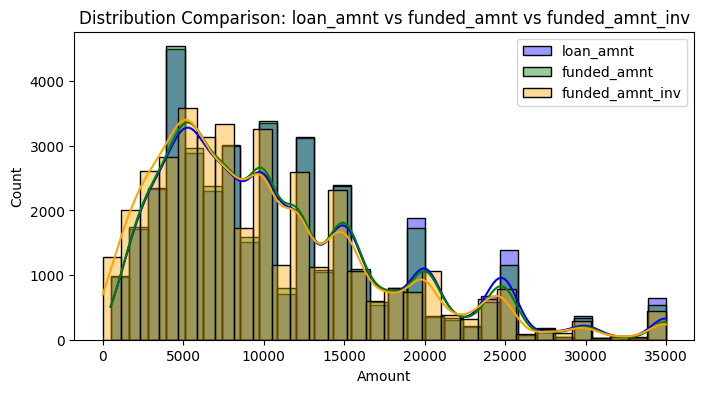

In [37]:
plt.figure(figsize=(8, 4))

sns.histplot(df['loan_amnt'], color='blue', kde=True, bins=30, label='loan_amnt', alpha=0.4)
sns.histplot(df['funded_amnt'], color='green', kde=True, bins=30, label='funded_amnt', alpha=0.4)
sns.histplot(df['funded_amnt_inv'], color='orange', kde=True, bins=30, label='funded_amnt_inv', alpha=0.4)

plt.title("Distribution Comparison: loan_amnt vs funded_amnt vs funded_amnt_inv")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.legend()
plt.show()

Most continuous variables are not normally distributed (Non-Gaussian)
Some variables look more normally distributed

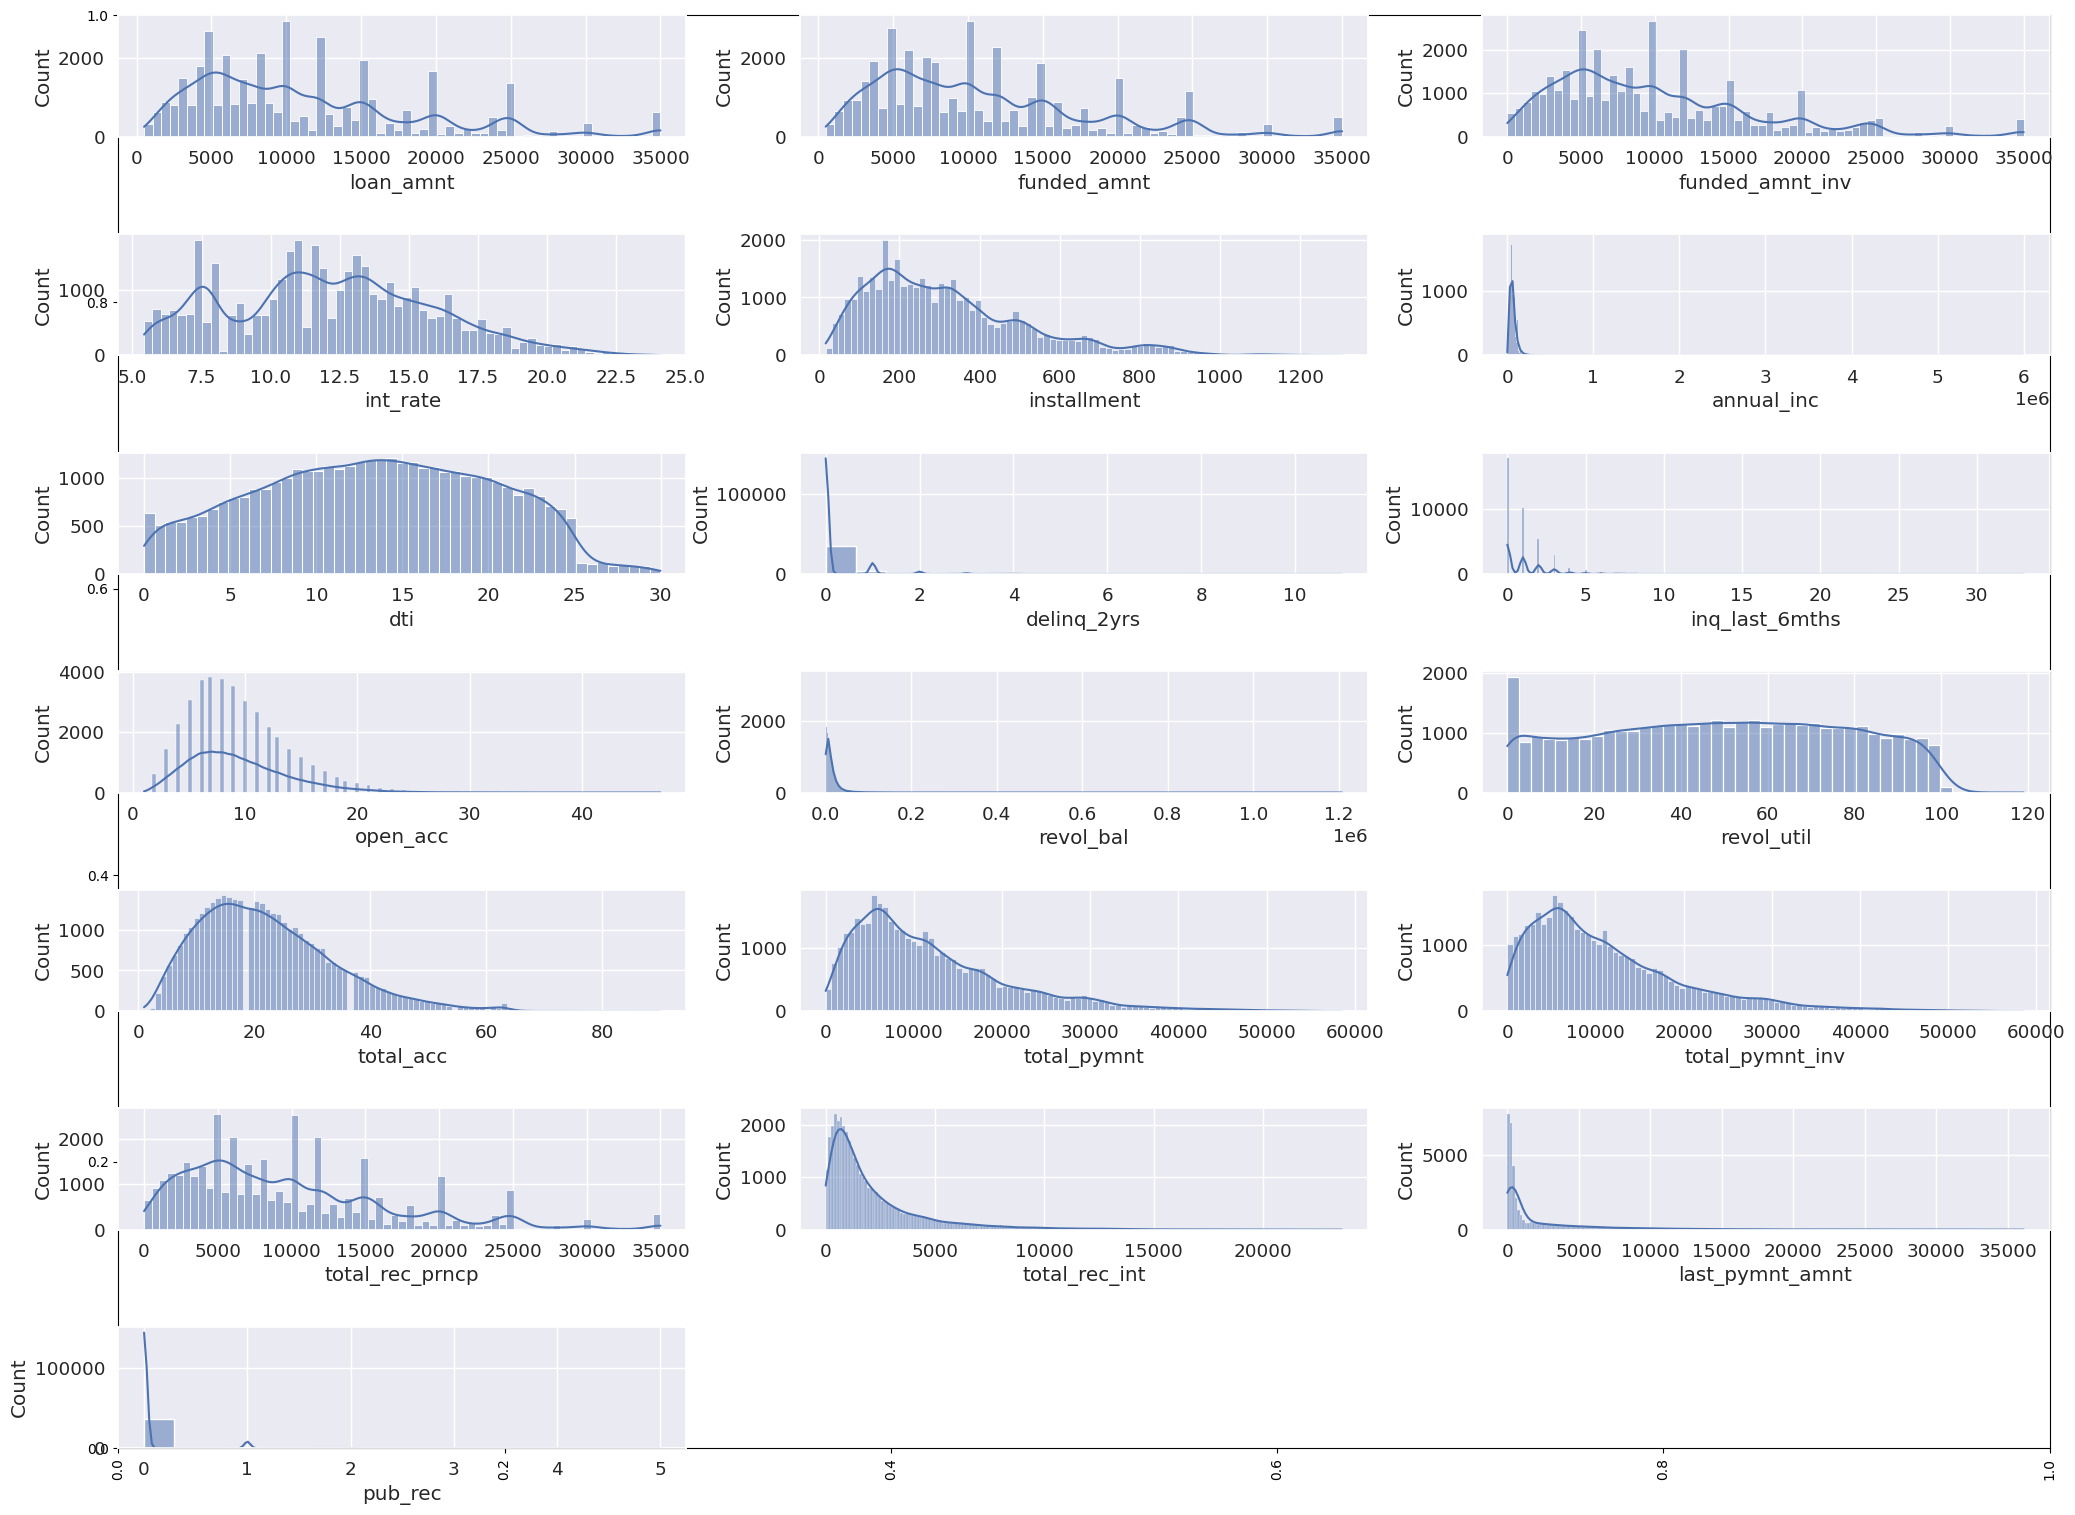

In [38]:
# plot values
cont_cols      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec']

plot_columns = 3
plot_rows = (len(cont_cols)//plot_columns) + len(cont_cols)%plot_columns

fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.8)
plt.xticks(rotation=90, ha='center')  # אחרי הקריאה ל-sns.barplot/plt.bar
plt.tight_layout()
sns.set(font_scale=1.2)

for plot_counter, col in enumerate(cont_cols, start=1):
    plt.subplot(plot_rows, plot_columns, plot_counter)
    sns.histplot(x=col, data=df, kde=True)

plt.show()

**DATES**

In [39]:
date_cols      = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [40]:
date_cols = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

for col in [c for c in date_cols if c in df.columns]:
    # 1) ניקוי: הוספת מקף בין חודש דו-אותי לשנתיים (Jul10 -> Jul-10), הסרת רווחים
    s = (df[col].astype(str).str.strip()
           .str.replace(r'(?i)^([A-Za-z]{3})[ -]?(\d{2})$', r'\1-\2', regex=True))

    # ) המרות:2
    dt = pd.to_datetime(s, format='%b-%y', errors='coerce')
    dt = dt.fillna(pd.to_datetime(s, errors='coerce', dayfirst=True))  # גיבוי גמיש

# (Optional) Fix two-digit years that rolled into the wrong century
# If earliest_cr_line is later than issue_d (which is illogical), subtract 100 years
    if col == 'earliest_cr_line' and 'issue_d' in df.columns:
        mask_fix = dt.notna() & df['issue_d'].notna() & (dt > pd.to_datetime(df['issue_d'], errors='coerce'))
        dt.loc[mask_fix] = dt.loc[mask_fix] - pd.DateOffset(years=100)

# 3) Normalize to a monthly resolution: set to the first day of each month
    dt_month_start = dt.dt.to_period('M').dt.to_timestamp(how='start')


    df[col] = dt_month_start

# 4) Create year/month fields for the column
    df[f'{col}_year']  = df[col].dt.year.astype('Int64')
    df[f'{col}_month'] = df[col].dt.month.astype('Int64')

 # 5) Report how many were not converted

    print(f"{col}: לא הומרו {df[col].isna().sum()} רשומות")

df[[c for c in df.columns if any(c.startswith(d) for d in date_cols)]].head()

issue_d: לא הומרו 0 רשומות
earliest_cr_line: לא הומרו 0 רשומות
last_pymnt_d: לא הומרו 71 רשומות
last_credit_pull_d: לא הומרו 3 רשומות


,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
1,2010-07-01,2005-08-01,2013-07-01,2016-06-01,2010,7,2005,8,2013,7,2016,6
2,2010-06-01,1994-04-01,2011-11-01,2012-03-01,2010,6,1994,4,2011,11,2012,3
3,2011-09-01,1998-03-01,2014-03-01,2014-03-01,2011,9,1998,3,2014,3,2014,3
4,2011-09-01,1975-01-01,2014-02-01,2016-06-01,2011,9,1975,1,2014,2,2016,6
5,2010-04-01,1998-04-01,2013-05-01,2016-06-01,2010,4,1998,4,2013,5,2016,6


In [41]:
#orginal date columns to pickel
#
date_cols = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
to_drop = date_cols
print(to_drop)
for c in to_drop:
    df = pickle_col(df, col=c, drop_col=True, pickle_name=f"drop_{c}")


['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']


In [42]:
import pandas as pd
import numpy as np


# mask_fix = (
#     df['earliest_cr_line_year'].notna() &
#     df['issue_d_year'].notna() &
#     (df['earliest_cr_line_year'] > df['issue_d_year'])
# )
# df.loc[mask_fix, 'earliest_cr_line_year'] = df.loc[mask_fix, 'earliest_cr_line_year'] - 100


# mask = df['earliest_cr_line_year'].notna() & df['issue_d_year'].notna()
# months = pd.Series(pd.NA, index=df.index, dtype='Int64')
# months[mask] = (
#     (df.loc[mask, 'issue_d_year']  - df.loc[mask, 'earliest_cr_line_year']) * 12 +
#     (df.loc[mask, 'issue_d_month'] - df.loc[mask, 'earliest_cr_line_month'])
# ).astype(int)
# # מספר חודשים בין תאריך לקיחת אשראי ראשונה לתאריך לקיחת הלוואה נכחי
# df['months_between_earliest_to_issue'] = months


In [43]:
df.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
1,545583,2500,2500,2500,36 months,13.98,85,4.0,RENT,20004,...,91,0,2010,7,2005,8,2013,7,2016,6
2,532101,5000,5000,5000,36 months,15.95,176,4.0,RENT,59000,...,176,1,2010,6,1994,4,2011,11,2012,3
3,877788,7000,7000,7000,36 months,9.91,226,10.0,MORTGAGE,53796,...,1550,0,2011,9,1998,3,2014,3,2014,3
4,875406,2000,2000,2000,36 months,5.42,60,10.0,RENT,30000,...,53,0,2011,9,1975,1,2014,2,2016,6
5,506439,3600,3600,3600,36 months,10.25,117,10.0,MORTGAGE,675048,...,147,0,2010,4,1998,4,2013,5,2016,6
6,981465,8000,8000,8000,36 months,6.03,243,<NA>,MORTGAGE,77736,...,1424,0,2011,10,1996,7,2014,4,2014,4
7,749050,6000,6000,6000,36 months,7.49,187,3.0,RENT,35000,...,211,0,2011,5,2003,10,2014,5,2014,5
8,1016373,25600,25600,25473,60 months,14.27,599,4.0,RENT,86000,...,16084,0,2011,11,1983,10,2014,4,2016,6
9,786870,19750,19750,19750,60 months,23.22,559,10.0,MORTGAGE,72500,...,15264,0,2011,6,1992,3,2013,6,2016,2
10,1019261,6250,6250,6250,36 months,17.27,224,4.0,MORTGAGE,28000,...,224,1,2011,11,1999,10,2014,4,2014,9


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        38478 non-null  int64   
 1   loan_amnt                 38478 non-null  Int64   
 2   funded_amnt               38478 non-null  Int64   
 3   funded_amnt_inv           38478 non-null  Int64   
 4   term                      38478 non-null  category
 5   int_rate                  38478 non-null  float64 
 6   installment               38478 non-null  Int64   
 7   emp_length                37485 non-null  category
 8   home_ownership            38478 non-null  category
 9   annual_inc                38477 non-null  Int64   
 10  verification_status       38478 non-null  category
 11  purpose                   38478 non-null  category
 12  addr_state                38478 non-null  category
 13  dti                       38478 non-null  float64 


In [45]:
print(df.isnull().sum()[df.isnull().any()])

emp_length                  993
annual_inc                    1
revol_bal                     3
revol_util                   59
last_pymnt_d_year            71
last_pymnt_d_month           71
last_credit_pull_d_year       3
last_credit_pull_d_month      3
dtype: int64


**CATEGORICAL**

In [46]:
#small_cat_cols = ['term','home_ownership','verification_status','loan_status','purpose']

In [47]:
def pickle_col(df, col='all', drop_col=False, include_merge_ID=True, pickle_name=""):

  import pickle
  if pickle_name == "":
    file_name = f"./pickles/{col}.pkl"
  else:
    file_name = f"./pickles/{pickle_name}.pkl"

  with open(file_name, 'wb') as f:

    if col =='all':
      pickle.dump(df, f)

    elif col in df.columns: # in case we aready droped the col before

      # track_id for a later merge, if we need.
      #and y_col so can can invetigate the pickel later indepandantly from the main df
      pickle.dump(df[[MERGE_ID_COL, col, y_col]], f)

    f.close()

  if drop_col == True:
    df.drop(col, axis=1, inplace=True, errors='ignore')

  return df

In [51]:
pickle_col(df, pickle_name="load_default_clean")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        38478 non-null  int64   
 1   loan_amnt                 38478 non-null  Int64   
 2   funded_amnt               38478 non-null  Int64   
 3   funded_amnt_inv           38478 non-null  Int64   
 4   term                      38478 non-null  category
 5   int_rate                  38478 non-null  float64 
 6   installment               38478 non-null  Int64   
 7   emp_length                37485 non-null  category
 8   home_ownership            38478 non-null  category
 9   annual_inc                38477 non-null  Int64   
 10  verification_status       38478 non-null  category
 11  purpose                   38478 non-null  category
 12  addr_state                38478 non-null  category
 13  dti                       38478 non-null  float64 


In [49]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
1,545583,2500,2500,2500,36 months,13.98,85,4.0,RENT,20004,...,91,0,2010,7,2005,8,2013,7,2016,6
2,532101,5000,5000,5000,36 months,15.95,176,4.0,RENT,59000,...,176,1,2010,6,1994,4,2011,11,2012,3
3,877788,7000,7000,7000,36 months,9.91,226,10.0,MORTGAGE,53796,...,1550,0,2011,9,1998,3,2014,3,2014,3
4,875406,2000,2000,2000,36 months,5.42,60,10.0,RENT,30000,...,53,0,2011,9,1975,1,2014,2,2016,6
5,506439,3600,3600,3600,36 months,10.25,117,10.0,MORTGAGE,675048,...,147,0,2010,4,1998,4,2013,5,2016,6


In [52]:
# Get the list of files in the pickles directory
pickle_files = [f for f in os.listdir("./pickles/") if os.path.isfile(os.path.join("./pickles/", f))]
download_pickels = True
if download_pickels:
  # Download each file individually
  for file_name in pickle_files:
      files.download(os.path.join("./pickles/", file_name))

  "pickles downloaded locally on your PC"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>